# Titanic Survival Prediction
* Use the Titanic dataset to build a model that predicts whether a
passenger on the Titanic survived or not. This is a classic beginner
project with readily available data.
* The dataset typically used for this project contains information
about individual passengers, such as their age, gender, ticket
class, fare, cabin, and whether or not they survived.

Dataset: [dataset.csv](https://www.kaggle.com/datasets/yasserh/titanic-dataset)

# Loading and Exploring the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd

# Load the CSV file
file_path = pd.read_csv("/content/drive/MyDrive/CodSoft/Task 1/Titanic-Dataset.csv")
df = pd.DataFrame(file_path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
df.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
df.shape
print(f'Number of rows : {df.shape[0]}')
print(f'Number of columns : {df.shape[1]}')

Number of rows : 891
Number of columns : 12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Data Pre-Processing

In [ ]:
df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())
df.drop(['Cabin', 'Name', 'Ticket'], axis=1, inplace=True)
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

df.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,0


In [ ]:
df.Sex.unique()

array(['male', 'female'], dtype=object)

In [ ]:
df.Sex=df.Sex.replace(['male','female'],[1,0])
df.head()

<ipython-input-82-4e5a47fc7876>:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Sex=df.Sex.replace(['male','female'],[1,0])


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,S
1,2,1,1,0,38.0,1,0,71.2833,C
2,3,1,3,0,26.0,0,0,7.9250,S
3,4,1,1,0,35.0,1,0,53.1000,S
4,5,0,3,1,35.0,0,0,8.0500,S


# Percantage of Males and Females on Ship

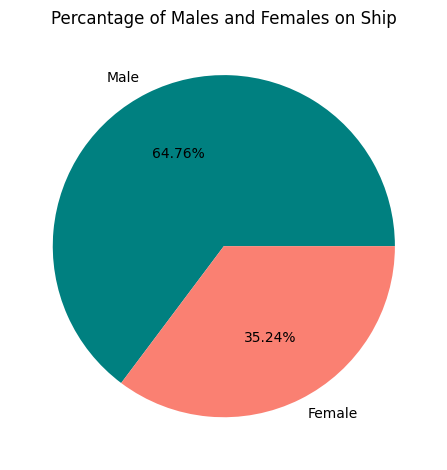

In [ ]:
import matplotlib.pyplot as plt

labeling = ['Males', 'Female']
colors = ['teal','salmon']

plt.pie(df['Sex'].value_counts(), colors=colors, labels=['Male','Female'], autopct='%1.2f%%')
plt.title('Percantage of Males and Females on Ship')
plt.tight_layout()
plt.show()

# Data Pre-Processing

In [ ]:
df.Embarked.unique()

array(['S', 'C', 'Q'], dtype=object)

In [ ]:
df.Embarked=df.Embarked.replace(['S','C','Q'],[1,2,3])
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,1
1,2,1,1,0,38.0,1,0,71.2833,2
2,3,1,3,0,26.0,0,0,7.9250,1
3,4,1,1,0,35.0,1,0,53.1000,1
4,5,0,3,1,35.0,0,0,8.0500,1


In [ ]:
final = df.groupby('Pclass').agg(
    male=pd.NamedAgg(column='Sex', aggfunc=lambda x: (x == 1).sum()),
    female=pd.NamedAgg(column='Sex', aggfunc=lambda x: (x == 0).sum()),
    embarked=pd.NamedAgg(column='Embarked', aggfunc='count')
).reset_index()
print(final)

   Pclass  male  female  embarked
0       1   122      94       216
1       2   108      76       184
2       3   347     144       491


# Male and Female Distribution by Ticket Class

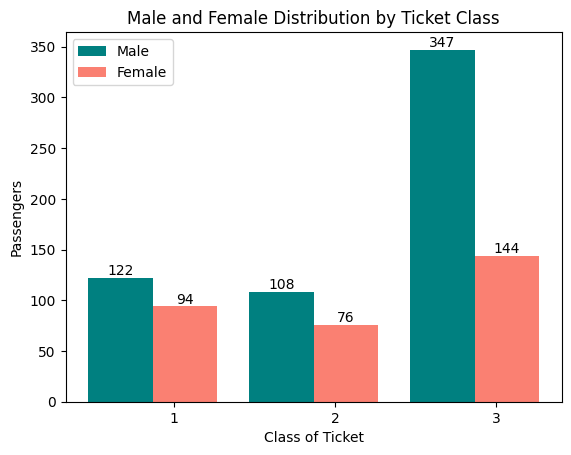

In [ ]:
import numpy as np

x_indices = np.arange(len(final['Pclass']))

male_bars = plt.bar(x_indices - 0.2, final['male'], width=0.4, label='Male', color='teal')
female_bars = plt.bar(x_indices + 0.2, final['female'], width=0.4, label='Female', color='salmon')

bar_width = 0.4
plt.xticks(x_indices, final['Pclass'])

plt.xlabel('Class of Ticket')
plt.ylabel('Passengers')
plt.title('Male and Female Distribution by Ticket Class')
plt.xticks(x_indices + bar_width / 3, final['Pclass'])
plt.legend()

for bars in [male_bars, female_bars]:
    for bar in bars:
           plt.text(
               bar.get_x() + bar.get_width() / 2,
               bar.get_height(),
               round(bar.get_height()),
               ha='center',
               va='bottom',
               color='black'
           )

plt.show()

# Correlation

In [ ]:
print(df.corr())

             PassengerId  Survived    Pclass       Sex       Age     SibSp  \
PassengerId     1.000000 -0.005007 -0.035144  0.042939  0.033207 -0.057527   
Survived       -0.005007  1.000000 -0.338481 -0.543351 -0.069809 -0.035322   
Pclass         -0.035144 -0.338481  1.000000  0.131900 -0.331339  0.083081   
Sex             0.042939 -0.543351  0.131900  1.000000  0.084153 -0.114631   
Age             0.033207 -0.069809 -0.331339  0.084153  1.000000 -0.232625   
SibSp          -0.057527 -0.035322  0.083081 -0.114631 -0.232625  1.000000   
Parch          -0.001652  0.081629  0.018443 -0.245489 -0.179191  0.414838   
Fare            0.012658  0.257307 -0.549500 -0.182333  0.091566  0.159651   
Embarked       -0.030467  0.106811  0.045702 -0.116569  0.007461 -0.059961   

                Parch      Fare  Embarked  
PassengerId -0.001652  0.012658 -0.030467  
Survived     0.081629  0.257307  0.106811  
Pclass       0.018443 -0.549500  0.045702  
Sex         -0.245489 -0.182333 -0.116569  

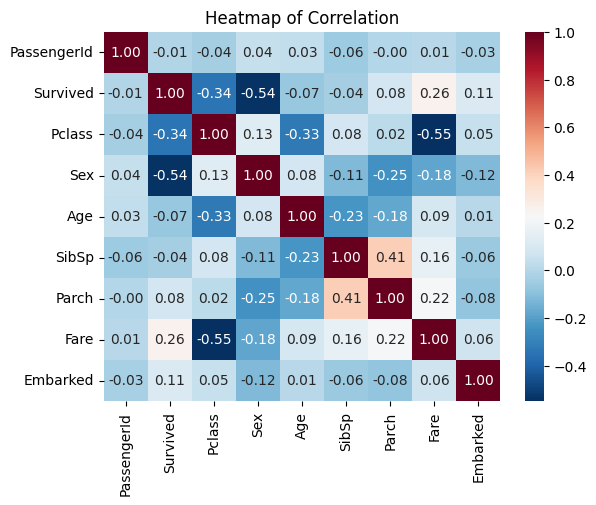

In [ ]:
import seaborn as sns

corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot=True, cmap='RdBu_r', fmt=".2f")
plt.title('Heatmap of Correlation')
plt.show()

# Feature Engineering

In [ ]:
final = df.groupby('Pclass').agg(
    male=pd.NamedAgg(column='Sex', aggfunc=lambda x: (x == 1).sum()),
    male_survived=pd.NamedAgg(column='Survived', aggfunc=lambda x: (x[df['Sex'] == 1].sum())),
    female=pd.NamedAgg(column='Sex', aggfunc=lambda x: (x == 0).sum()),
    female_survived=pd.NamedAgg(column='Survived', aggfunc=lambda x: (x[df['Sex'] == 0].sum())),
    embarked=pd.NamedAgg(column='Embarked', aggfunc='count'),
    embarked_survived=('Survived', lambda x: (x == 1).sum())
).reset_index()

print(final)

   Pclass  male  male_survived  female  female_survived  embarked  \
0       1   122             45      94               91       216   
1       2   108             17      76               70       184   
2       3   347             47     144               72       491   

   embarked_survived  
0                136  
1                 87  
2                119  


# Survival Distribution by Gender

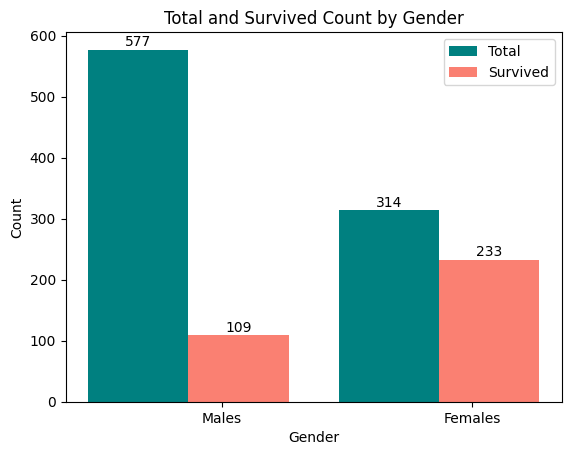

In [ ]:
final_summary = {
    'total_males': (df['Sex'] == 1).sum(),
    'males_survived': ((df['Sex'] == 1) & (df['Survived'] == 1)).sum(),
    'total_females': (df['Sex'] == 0).sum(),
    'females_survived': ((df['Sex'] == 0) & (df['Survived'] == 1)).sum()
}

groups = ['Males', 'Females']
survived_counts = [final_summary['males_survived'], final_summary['females_survived']]
total_counts = [final_summary['total_males'], final_summary['total_females']]
x_indices = np.arange(len(groups))
bar_witch = 0.4

total_bars = plt.bar(x_indices - bar_witch / 2, total_counts, width=bar_witch, label='Total', color='teal')
survived_bars = plt.bar(x_indices + bar_witch / 2, survived_counts, width=bar_witch, label='Survived', color='salmon')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Total and Survived Count by Gender')
plt.xticks(x_indices + bar_width / 3, groups)
plt.legend()

for bars in [total_bars, survived_bars]:
    for bar in bars:
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height() + 1,
            str(int(bar.get_height())),
            ha='center',
            va='bottom',
            color='black'
        )

plt.show()

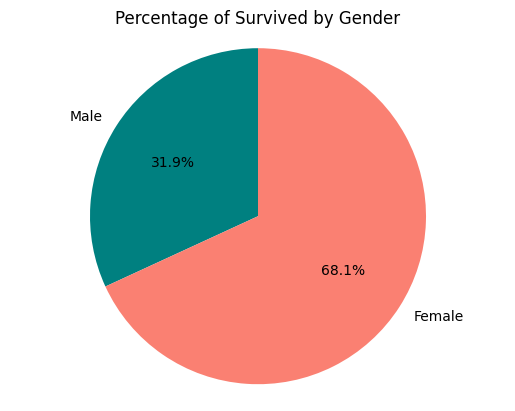

In [ ]:
labels = ['Male', 'Female']
sizes = [final_summary['males_survived'], final_summary['females_survived']]
colors = ['teal', 'salmon']

plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Percentage of Survived by Gender')
plt.axis('equal')
plt.show()

# Survived Count by Class

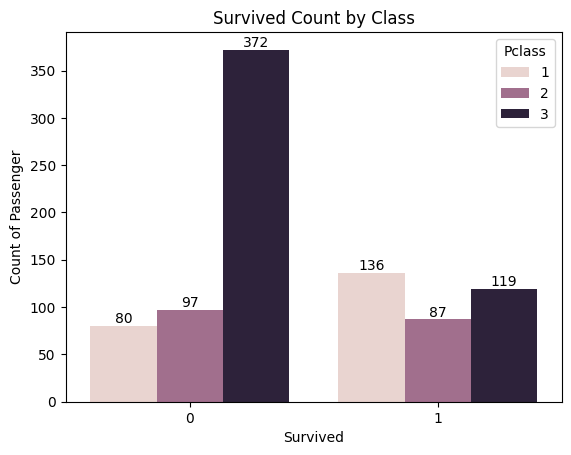

In [ ]:
ax = sns.countplot(x='Survived', hue='Pclass', data=df)

for container in ax.containers:
    ax.bar_label(container, label_type='edge', fontsize=10, color='black')

plt.xlabel('Survived')
plt.ylabel('Count of Passenger')
plt.title('Survived Count by Class')
plt.legend(title='Pclass')
plt.show()

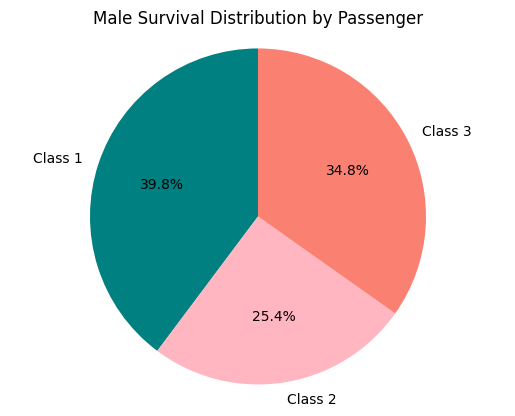

In [ ]:
class_survival=df.groupby(['Survived', 'Pclass']).size().reset_index(name='Count')

survivor_data=class_survival[class_survival['Survived']==1]
labels = ['Class 1', 'Class 2', 'Class 3']
sizes = survivor_data['Count']
colors = ['teal', 'lightpink', 'salmon']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Male Survival Distribution by Passenger")
plt.axis("equal")
plt.show()

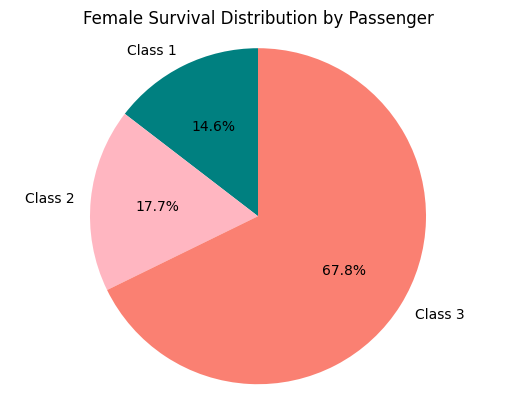

In [ ]:
survival_by_class = df.groupby(['Survived', 'Pclass']).size().reset_index(name='Count')

survivor_data = survival_by_class[survival_by_class['Survived'] == 0]
labels = ['Class 1', 'Class 2', 'Class 3']
sizes = survivor_data['Count']
colors = ['teal', 'lightpink', 'salmon']

plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=colors, startangle=90)
plt.title("Female Survival Distribution by Passenger")
plt.axis("equal")
plt.show()

# Age Distribution by Survival

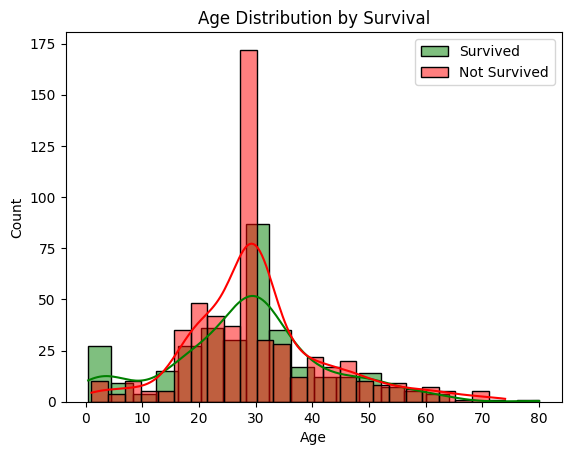

In [ ]:
sns.histplot(df[df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(df[df['Survived'] == 0]['Age'], kde=True, color='red', label='Not Survived')
plt.legend()
plt.title("Age Distribution by Survival")
plt.xlabel("Age")
plt.ylabel("Count")
plt.show()

# Feature Engineering

In [ ]:
df['FamilySize'] = df['SibSp'] + df['Parch']
df['IsAlone'] = (df['FamilySize'] == 0).astype(int)
df.drop(['SibSp', 'Parch'], axis=1, inplace=True)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked,FamilySize,IsAlone
0,1,0,3,1,22.0,7.2500,1,1,0
1,2,1,1,0,38.0,71.2833,2,1,0
2,3,1,3,0,26.0,7.9250,1,0,1
3,4,1,1,0,35.0,53.1000,1,1,0
4,5,0,3,1,35.0,8.0500,1,0,1


# Family and Alone Distribution

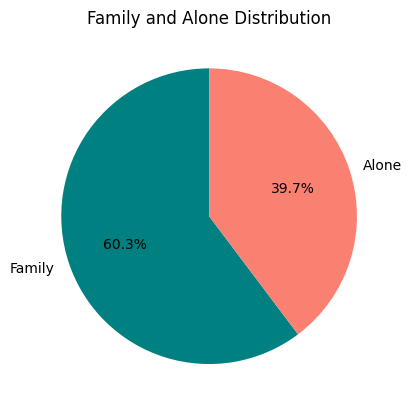

In [ ]:
counts_of_alone = df['IsAlone'].value_counts()
labels = ['Family', 'Alone']
plt.pie(counts_of_alone, labels=labels, autopct='%1.1f%%', startangle=90, colors=['teal','salmon'])
plt.title("Family and Alone Distribution")
plt.show()

# Model Building and Evaluation

# Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare features and target
X = df.drop(['Survived'], axis=1)  # Features
y = df['Survived']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predict on test data
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Random Forest Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Random Forest Model Evaluation
Accuracy: 0.8324
Confusion Matrix:
 [[94 11]
 [19 55]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       105
           1       0.83      0.74      0.79        74

    accuracy                           0.83       179
   macro avg       0.83      0.82      0.82       179
weighted avg       0.83      0.83      0.83       179



# XGB Classifier

In [ ]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Prepare features and target
X = df.drop(['Survived'], axis=1)  # Features
y = df['Survived']  # Target variable

# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the XGBoost model
xg_model = xgb.XGBClassifier(n_estimators=100, random_state=42)
xg_model.fit(X_train, y_train)

# Predict on test data
y_pred = xg_model.predict(X_test)

# Evaluate the model
print("XGBoost Model Evaluation")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

XGBoost Model Evaluation
Accuracy: 0.7933
Confusion Matrix:
 [[88 17]
 [20 54]]
Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.84      0.83       105
           1       0.76      0.73      0.74        74

    accuracy                           0.79       179
   macro avg       0.79      0.78      0.79       179
weighted avg       0.79      0.79      0.79       179



# Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

# GridSearchCV for RandomForest
param_grid_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', verbose=1)
grid_rf.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters for Random Forest:")
print(grid_rf.best_params_)

# Evaluate the best model
best_rf_model = grid_rf.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

print(f"Random Forest Accuracy (after tuning): {accuracy_score(y_test, y_pred_rf):.4f}")

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Hyperparameters for Random Forest:
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Random Forest Accuracy (after tuning): 0.8045


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score

# Hyperparameters for XGBoost tuning
param_dist_xg = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Initialize the RandomizedSearchCV with XGBoost model
random_search_xg = RandomizedSearchCV(XGBClassifier(random_state=42), param_dist_xg, n_iter=10, cv=5, verbose=1, random_state=42)

# Fit the model with training data
random_search_xg.fit(X_train, y_train)

# Best parameters
print("Best Hyperparameters for XGBoost:")
print(random_search_xg.best_params_)

# Evaluate the best model
best_xg_model = random_search_xg.best_estimator_
y_pred_xg = best_xg_model.predict(X_test)

print(f"XGBoost Accuracy (after tuning): {accuracy_score(y_test, y_pred_xg):.4f}")

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters for XGBoost:
{'subsample': 0.8, 'n_estimators': 300, 'max_depth': 3, 'learning_rate': 0.01, 'colsample_bytree': 0.8}
XGBoost Accuracy (after tuning): 0.7989


# Feature Importance Plot

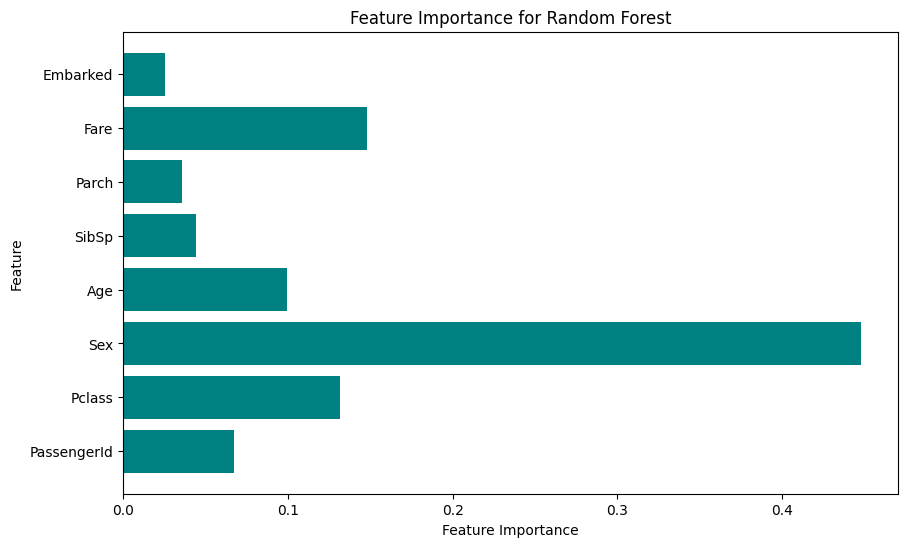

In [ ]:
# Random Forest Feature Importance
feature_importances_rf = best_rf_model.feature_importances_
feature_names = X.columns

# Plotting feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, feature_importances_rf, color='teal')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for Random Forest')
plt.show()

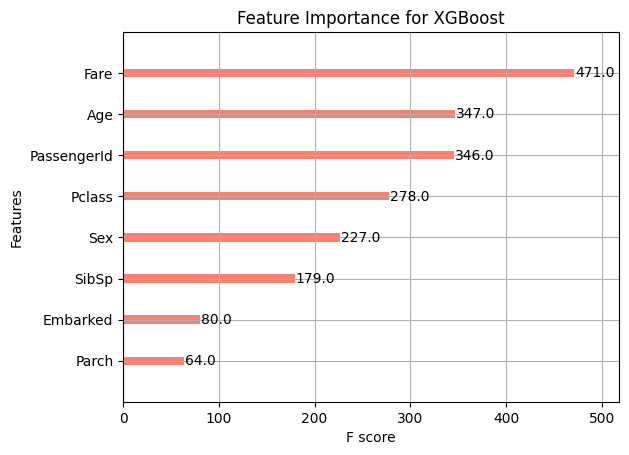

In [ ]:
# XGBoost Feature Importance
xgb.plot_importance(best_xg_model, importance_type='weight', color='salmon')
plt.title('Feature Importance for XGBoost')
plt.show()

# Accuracy Comparison

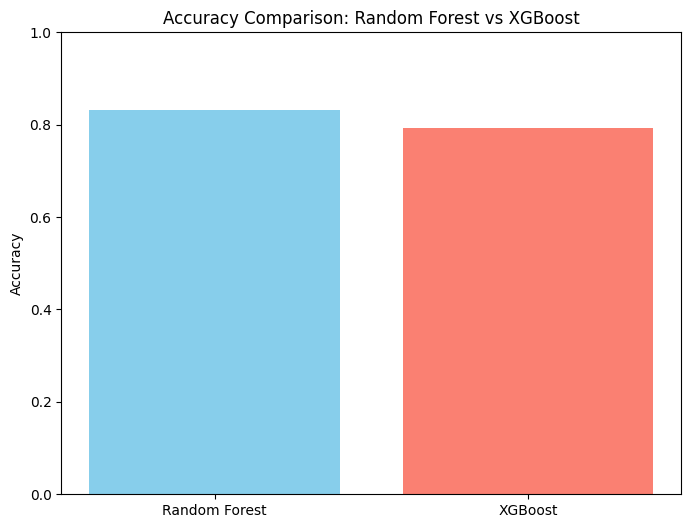

In [ ]:
import matplotlib.pyplot as plt

# Train Random Forest and XGBoost models (assuming previous training code is already run)
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Compute accuracy for Random Forest
rf_accuracy = accuracy_score(y_test, y_pred_rf)

# Train XGBoost model
xg_model = XGBClassifier(random_state=42)
xg_model.fit(X_train, y_train)
y_pred_xg = xg_model.predict(X_test)

# Compute accuracy for XGBoost
xg_accuracy = accuracy_score(y_test, y_pred_xg)

# Plot the comparison of accuracies between XGBoost and Random Forest
models = ['Random Forest', 'XGBoost']
accuracies = [rf_accuracy, xg_accuracy]

plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['skyblue', 'salmon'])
plt.ylim([0, 1])
plt.title("Accuracy Comparison: Random Forest vs XGBoost")
plt.ylabel("Accuracy")
plt.show()

# Confusion Matrices

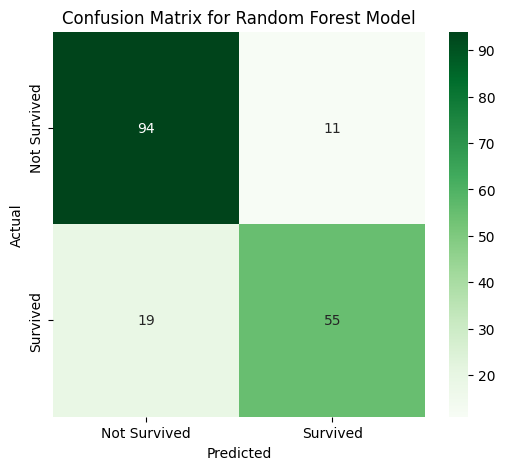

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Train the Random Forest model
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

# Generate predictions using the trained Random Forest model
y_pred_rf = rf_model.predict(X_test)

# Compute confusion matrix
cm_rf = confusion_matrix(y_test, y_pred_rf)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm_rf, annot=True, fmt="d", cmap="Greens", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for Random Forest Model")
plt.show()

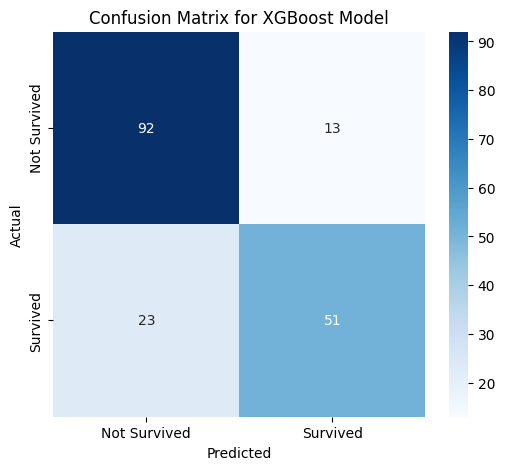

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

# Generate predictions using the best XGBoost model
y_pred_xg = best_xg_model.predict(X_test)

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred_xg)

# Plot the confusion matrix using a heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Not Survived", "Survived"], yticklabels=["Not Survived", "Survived"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix for XGBoost Model")
plt.show()

# Model Perfomance Report

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Random Forest Model Report
print("Random Forest Model Report")
print("----------------------------")
print(f"Random Forest Accuracy: {accuracy_score(y_test, y_pred_rf):.4f}")
print("Random Forest Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))
print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf))

# XGBoost Model Report
print("\nXGBoost Model Report")
print("---------------------")
print(f"XGBoost Accuracy: {accuracy_score(y_test, y_pred_xg):.4f}")
print("XGBoost Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_xg))
print("XGBoost Classification Report:")
print(classification_report(y_test, y_pred_xg))

Random Forest Model Report
----------------------------
Random Forest Accuracy: 0.8045
Random Forest Confusion Matrix:
[[93 12]
 [23 51]]
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.89      0.84       105
           1       0.81      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179


XGBoost Model Report
---------------------
XGBoost Accuracy: 0.7989
XGBoost Confusion Matrix:
[[92 13]
 [23 51]]
XGBoost Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       105
           1       0.80      0.69      0.74        74

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

